In [70]:
# import of necessary files from other folders

import os
import sys

path = os.path.abspath('')
base_path = path.split('/microbial_ecology_in_space')[0]
module_path = f'{base_path}/microbial_ecology_in_space/models/shared'
module_path_1 = f'{base_path}/microbial_ecology_in_space/models/well_mixed'

# Add the directory to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)
if module_path_1 not in sys.path:
    sys.path.append(module_path_1)

# libraries imports

import importlib
import numpy as np
import matplotlib.pyplot as plt
import tempfile

from IPython.display import Image, display
from PIL import Image

import visualize
import definitions
import well_mixed
import competition_facilitation_CR

importlib.reload(definitions)
importlib.reload(well_mixed)
importlib.reload(visualize)
importlib.reload(competition_facilitation_CR)

<module 'competition_facilitation_CR' from '/Users/federicasibilla/Documenti/Tesi/microbial_ecology_in_space/networks/competition_facilitation_CR.py'>

# Modulating competition

In [52]:
# creating and visualizing C matrices with different beta and kc

C_list = []

for beta in np.arange(1,6):
    for kc in np.arange(0,1,0.1):

        C_list.append(competition_facilitation_CR.generate_C(8,8,kc,beta))

In [53]:
# calculate competition for each matrix

comp_list=[]

for matrix in C_list:
    comp_list.append(competition_facilitation_CR.calculate_C(matrix))

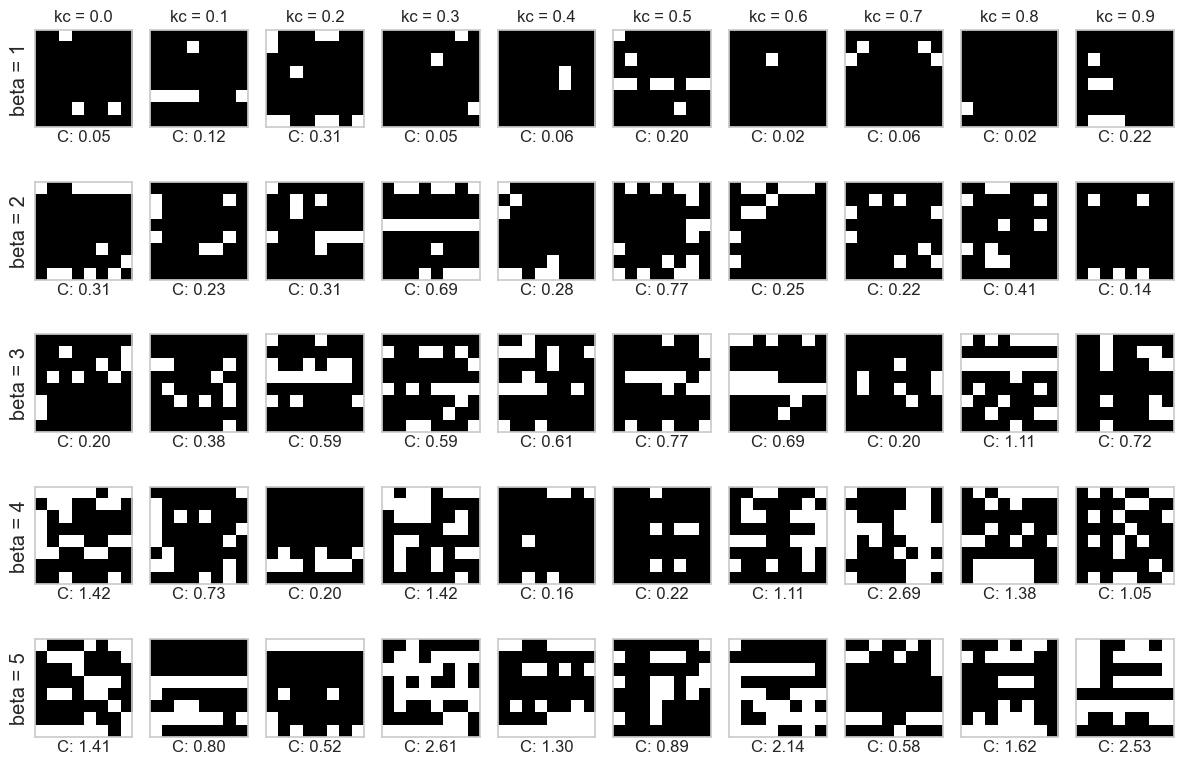

In [54]:

# Assuming you already have C_list from your previous code
kc_values = np.arange(0, 1, 0.1)
beta_values = np.arange(1, 6)

# Number of rows and columns for the grid
n_rows = len(beta_values)
n_cols = len(kc_values)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate through beta and kc values and plot each matrix
for i, beta in enumerate(beta_values):
    for j, kc in enumerate(kc_values):
        # Find the corresponding matrix in C_list
        index = i * len(kc_values) + j
        matrix = C_list[index]
        
        # Plot the matrix as a binary image (0 -> white, 1 -> black)
        axes[i, j].imshow(matrix, cmap='gray', vmin=0, vmax=1)

        # Remove the axis ticks
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        # Add the corresponding comp_list value as text below the matrix
        axes[i,j].text(0.5, -0.1, f'C: {comp_list[index]:.2f}', 
        size=12, ha='center', va='center', transform=axes[i,j].transAxes)

# Set the labels for the columns (kc values)
for ax, kc in zip(axes[0], kc_values):
    ax.set_title(f'kc = {kc:.1f}')

# Set the labels for the rows (beta values)
for ax, beta in zip(axes[:, 0], beta_values):
    ax.set_ylabel(f'beta = {beta}', rotation=90, size='large')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Modulating facilitation

In [71]:
# create D with different facilitation scores for a low and a high competition matrix

# low competition
D_list_low = []

for s in np.arange(0.01,1,0.1):
    for kf in np.arange(0,1,0.1):

        D_list_low.append(competition_facilitation_CR.generate_D(8, s, kf, C_list[13]))

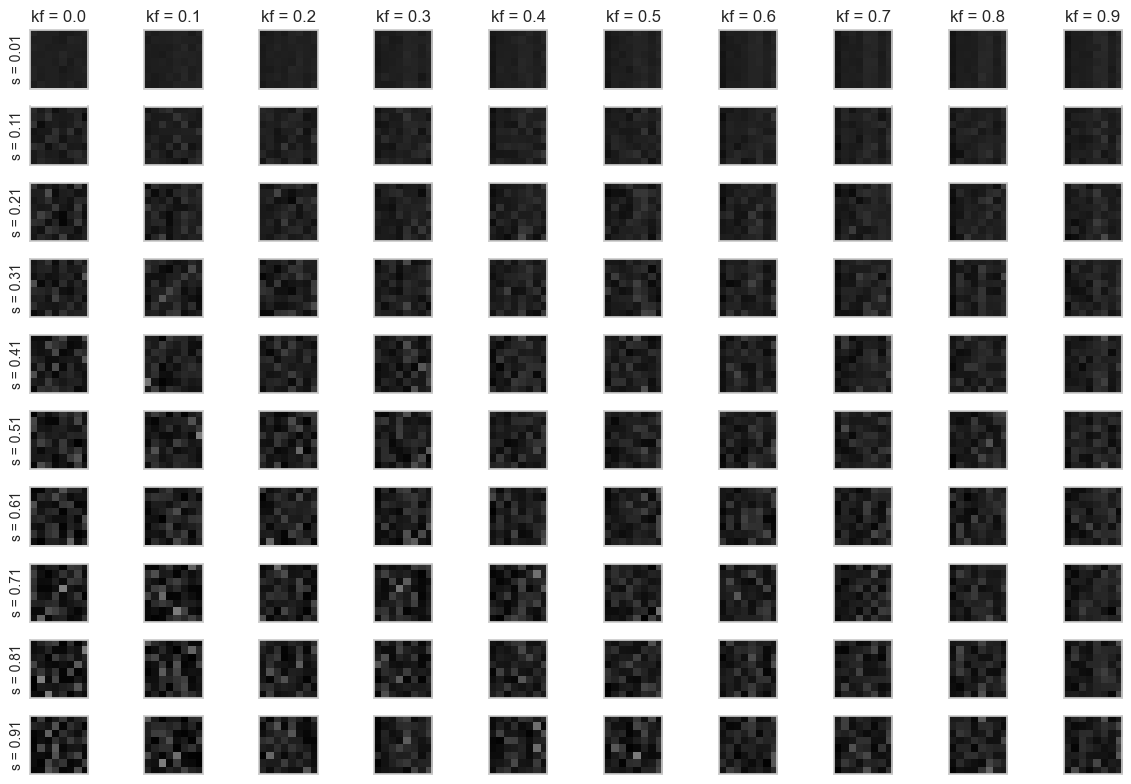

In [77]:

# Assuming you already have C_list from your previous code
s_values = np.arange(0.01, 1, 0.1)
kf_values = np.arange(0,1,0.1)

# Number of rows and columns for the grid
n_rows = len(s_values)
n_cols = len(kf_values)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate through beta and kc values and plot each matrix
for i, beta in enumerate(s_values):
    for j, kc in enumerate(kf_values):
        # Find the corresponding matrix in C_list
        index = i * len(kc_values) + j
        matrix = D_list_low[index]
        
        # Plot the matrix as a binary image (0 -> white, 1 -> black)
        axes[i, j].imshow(matrix, cmap='gray', vmin=0, vmax=1)

        # Remove the axis ticks
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        # Add the corresponding comp_list value as text below the matrix
        #axes[i,j].text(0.5, -0.1, f'F: {comp_list[index]:.2f}', 
        #size=12, ha='center', va='center', transform=axes[i,j].transAxes)

# Set the labels for the columns (kc values)
for ax, kc in zip(axes[0], kf_values):
    ax.set_title(f'kf = {kc:.1f}')

# Set the labels for the rows (beta values)
for ax, beta in zip(axes[:, 0], s_values):
    ax.set_ylabel(f's = {np.round(beta,2)}', rotation=90, size='small')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [78]:
# create D with different facilitation scores for a low and a high competition matrix

# high competition
D_list_high = []

for s in np.arange(0.01,1,0.1):
    for kf in np.arange(0,1,0.1):

        D_list_high.append(competition_facilitation_CR.generate_D(8, s, kf, C_list[-1]))

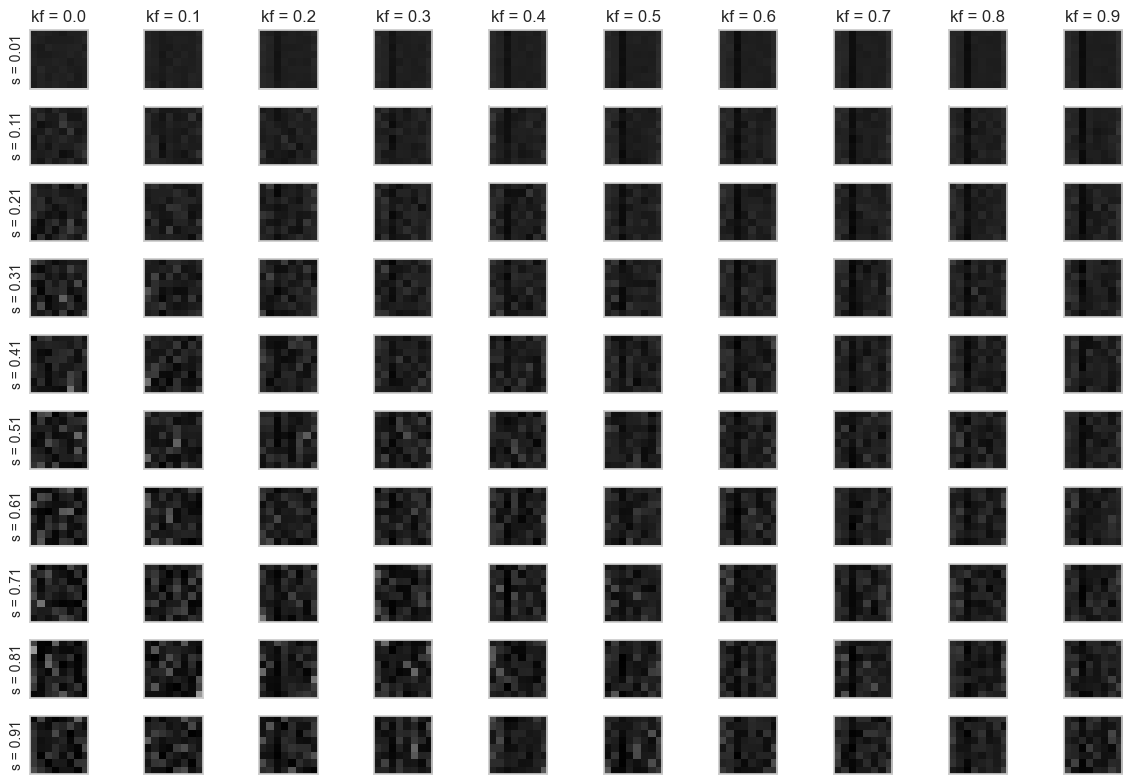

In [79]:

# Assuming you already have C_list from your previous code
s_values = np.arange(0.01, 1, 0.1)
kf_values = np.arange(0,1,0.1)

# Number of rows and columns for the grid
n_rows = len(s_values)
n_cols = len(kf_values)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate through beta and kc values and plot each matrix
for i, beta in enumerate(s_values):
    for j, kc in enumerate(kf_values):
        # Find the corresponding matrix in C_list
        index = i * len(kc_values) + j
        matrix = D_list_high[index]
        
        # Plot the matrix as a binary image (0 -> white, 1 -> black)
        axes[i, j].imshow(matrix, cmap='gray', vmin=0, vmax=1)

        # Remove the axis ticks
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        # Add the corresponding comp_list value as text below the matrix
        #axes[i,j].text(0.5, -0.1, f'F: {comp_list[index]:.2f}', 
        #size=12, ha='center', va='center', transform=axes[i,j].transAxes)

# Set the labels for the columns (kc values)
for ax, kc in zip(axes[0], kf_values):
    ax.set_title(f'kf = {kc:.1f}')

# Set the labels for the rows (beta values)
for ax, beta in zip(axes[:, 0], s_values):
    ax.set_ylabel(f's = {np.round(beta,2)}', rotation=90, size='small')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Simulate the corresponding CR for high and low competition

# Map to as many LV

# Compare C and F metric with number of positive and negative interactions in LV